# Telco Churn Classification Project

## Overview

## Data Exploration

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# Load data
df = pd.read_excel('data/churn.xlsx')

In [7]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
# Print rows with null values
df[df.isna().any(axis=1)]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [10]:
# Show different churn reasons
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [11]:
# Get proportion of rows with no Churn Reason
null_rows = df[df['Churn Reason'].isna()]
ratio = len(null_rows) / len(df)
print(format(ratio, '.2%'))

73.46%


In [12]:
df['Country'].unique()

array(['United States'], dtype=object)

In [13]:
df['State'].unique()

array(['California'], dtype=object)

In [14]:
df['Zip Code'].value_counts()

Zip Code
90022    5
90024    5
90028    5
90029    5
90032    5
        ..
95991    4
96003    4
96010    4
96020    4
92620    4
Name: count, Length: 1652, dtype: int64

In [15]:
df['City'].value_counts()

City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Stonyford          4
Washington         4
Big Bar            4
Chester            4
Alta               4
Name: count, Length: 1129, dtype: int64

## Data Cleaning

**Drop redundant columns**

CustomerID: Not necessary

Count: We can count the rows without it

Country: All USA

State: All California

Zip Code , Lat Long, Latitude, Longitude: One feature for location is enough

Churn label: We have the churn value

In [18]:
df = df.drop(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label'], axis=1)

In [19]:
# Some total charges are not numbers
df['Total Charges'].value_counts()

Total Charges
          11
20.2      11
19.75      9
19.65      8
19.9       8
          ..
1419.4     1
1990.5     1
7362.9     1
346.45     1
820.5      1
Name: count, Length: 6531, dtype: int64

In [20]:
# Display lines where total charges are not numbers
not_numbers_mask = df['Total Charges'].str.contains(r'(\d+(?:\.\d+)?)', regex=True) == False
df[not_numbers_mask]

/var/folders/_f/65hyqq653ws_7lpphp7nvxd80000gn/T/ipykernel_6988/1501556972.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  not_numbers_mask = df['Total Charges'].str.contains(r'(\d+(?:\.\d+)?)', regex=True) == False


,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
2234,San Bernardino,Female,No,Yes,No,0,No,No phone service,DSL,Yes,...,No,Two year,Yes,Bank transfer (automatic),52.55,,0,36,2578,NaN
2438,Independence,Male,No,No,No,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.25,,0,68,5504,NaN
2568,San Mateo,Female,No,Yes,No,0,Yes,No,DSL,Yes,...,Yes,Two year,No,Mailed check,80.85,,0,45,2048,NaN
2667,Cupertino,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.75,,0,48,4950,NaN
2856,Redcrest,Female,No,Yes,No,0,No,No phone service,DSL,Yes,...,No,Two year,No,Credit card (automatic),56.05,,0,30,4740,NaN
4331,Los Angeles,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,19.85,,0,53,2019,NaN
4687,Sun City,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.35,,0,49,2299,NaN
5104,Ben Lomond,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.00,,0,27,3763,NaN
5719,La Verne,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,One year,Yes,Mailed check,19.70,,0,69,4890,NaN
6772,Bell,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,No,Two year,No,Mailed check,73.35,,0,44,2342,NaN


In [21]:
df.loc[not_numbers_mask]['Tenure Months']

2234    0
2438    0
2568    0
2667    0
2856    0
4331    0
4687    0
5104    0
5719    0
6772    0
6840    0
Name: Tenure Months, dtype: int64

In [22]:
df.loc[not_numbers_mask]['Monthly Charges']

2234    52.55
2438    20.25
2568    80.85
2667    25.75
2856    56.05
4331    19.85
4687    25.35
5104    20.00
5719    19.70
6772    73.35
6840    61.90
Name: Monthly Charges, dtype: float64

In [23]:
# Assuming those users just got with the company (not a full month), impute the rows with half of monthly charges
df.loc[not_numbers_mask, 'Total Charges'] = df.loc[not_numbers_mask, 'Monthly Charges'] / 2

# Convert to float
df['Total Charges'] = df['Total Charges'].astype('float')
assert df['Total Charges'].dtype == 'float'

In [24]:
df.loc[not_numbers_mask]['Total Charges']

2234    26.275
2438    10.125
2568    40.425
2667    12.875
2856    28.025
4331     9.925
4687    12.675
5104    10.000
5719     9.850
6772    36.675
6840    30.950
Name: Total Charges, dtype: float64

## Data Analysis (EDA)

In [26]:
# Display top 5 reasons why people leave
df['Churn Reason'].value_counts().head(5)

## This shows that customer service is an important factor for most people when choosing a telco company

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Name: count, dtype: int64

In [27]:
# Proportion of people who churn vs. people who don't
df['Churn Value'].value_counts(normalize=True)

## Unbalanced, about a 3 to 1 ratio

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

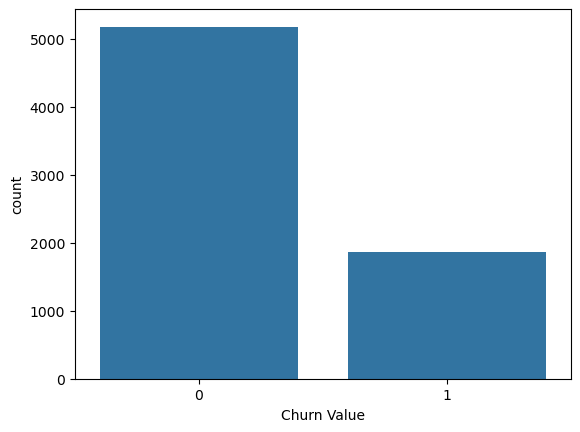

In [28]:
# Countplot
sns.countplot(data=df, x='Churn Value');

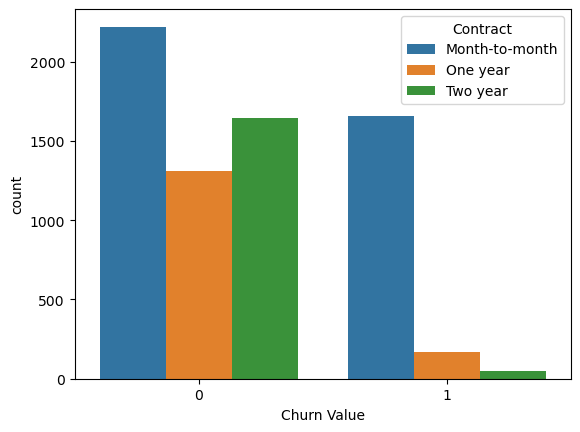

In [29]:
# Countplot contract type
sns.countplot(data=df, x='Churn Value', hue='Contract');

## People with monthly contracts are most likely to leave

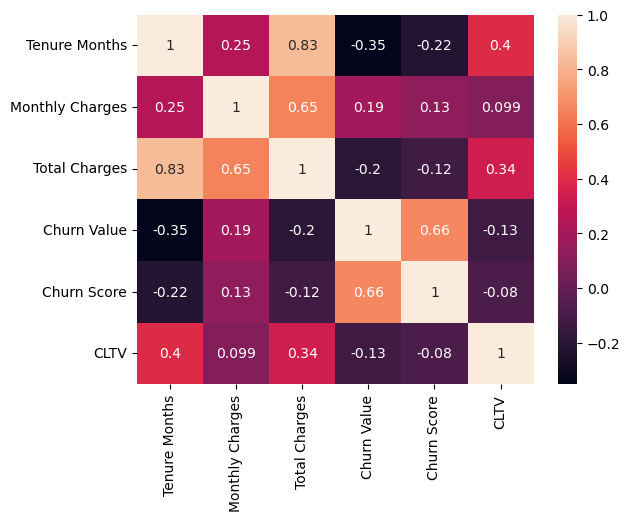

In [30]:
# Heatmap
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True);

In [31]:
# Correlations with Churn Value
correlations = corr_matrix.loc['Churn Value'].drop(['Churn Value']).sort_values()
correlations

Tenure Months     -0.352229
Total Charges     -0.198336
CLTV              -0.127463
Monthly Charges    0.193356
Churn Score        0.664897
Name: Churn Value, dtype: float64

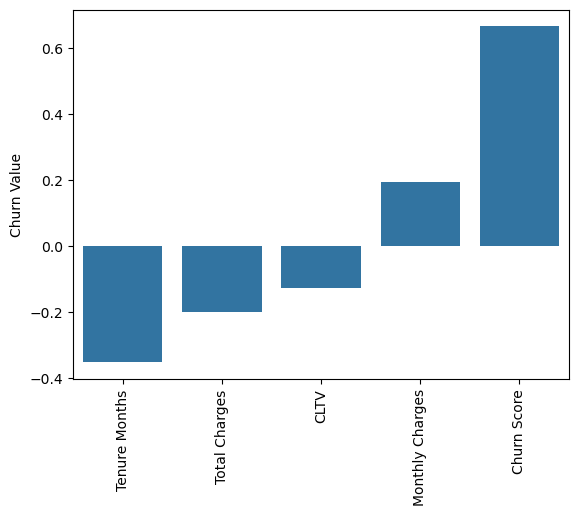

In [32]:
# Correlation barplot
ax = sns.barplot(data=correlations)
ax.tick_params(axis='x', rotation=90);

## The churn score is the most correlated factor

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


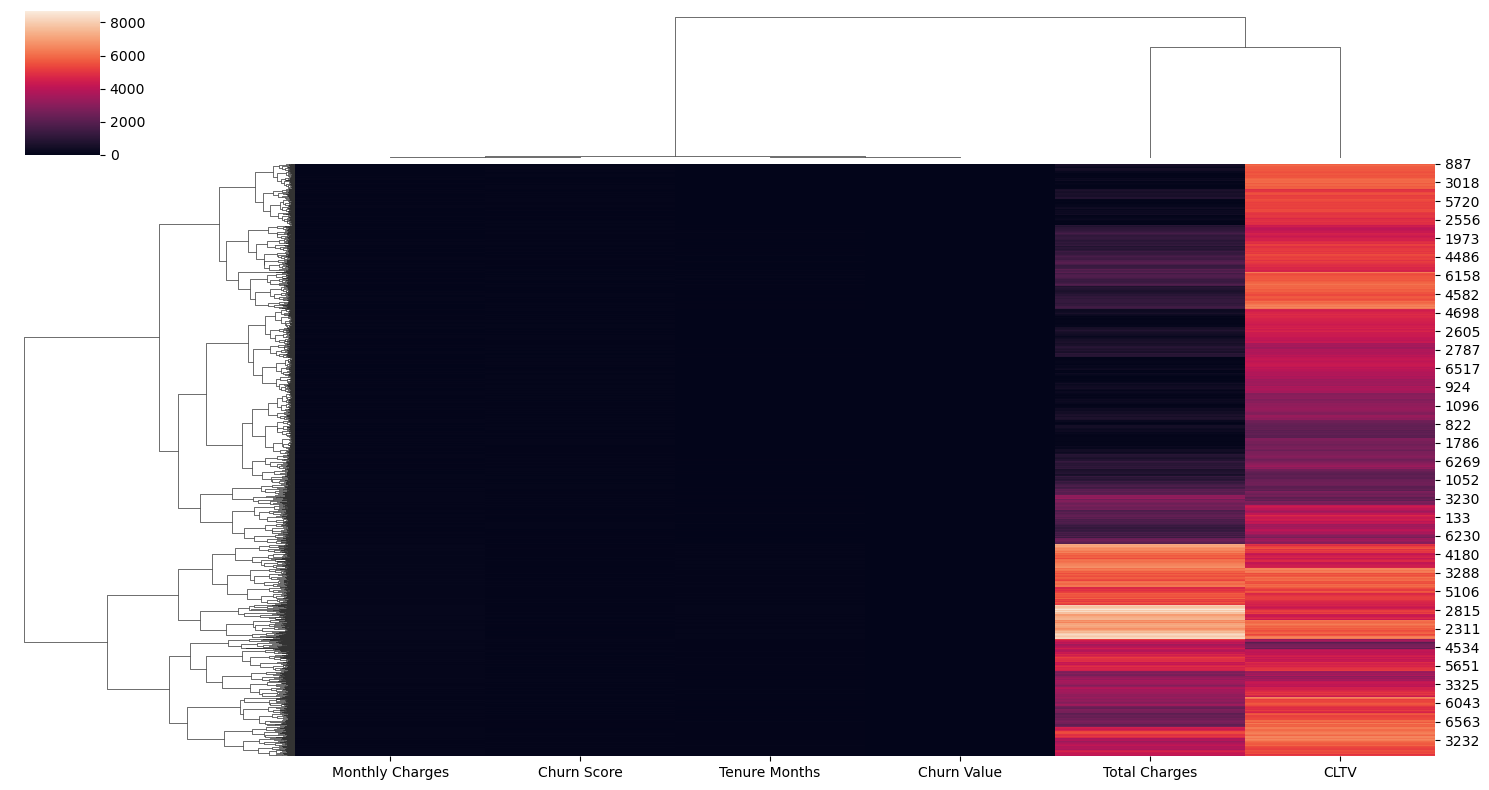

In [33]:
# Clustermap
sns.clustermap(df.select_dtypes(include=np.number), figsize=(15,8));

## Data Preprocessing

In [35]:
# Drop Churn Reason
df = df.drop('Churn Reason', axis=1)

In [36]:
# Use Frequency Encoding for City
freq_map = df['City'].value_counts()
df['City'] = df['City'].map(freq_map)
assert df['City'].dtype == 'int'

In [37]:
# Get non-numeric columns
is_string = (df.map(type) == str).all()
string_columns = list(is_string[is_string].index)
string_columns

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [38]:
# Une One Hot Encoding for non-numeric columns

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(df[string_columns])
new_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(string_columns))
df = df.drop(columns=string_columns, axis=1).join(new_df)

In [39]:
df.head()

,City,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,305,2,53.85,108.15,1,86,3239,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,305,2,70.70,151.65,1,67,2701,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,305,8,99.65,820.50,1,86,5372,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,305,28,104.80,3046.05,1,84,5003,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,305,49,103.70,5036.30,1,89,5340,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
# Assert all columns are numeric
len(df.columns) == len(df.select_dtypes([np.number]).columns)

True

## Data Modeling

### KNN

### SVM

### Logistic

### Final Model

#### Make predictions

## End